In [1]:
from preprocessing import *
from embeddings import *

/opt/conda/lib/python3.8/site-packages/gensim/similarities/__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


In [2]:
def preprocessing_pipeline(path, embedding_technique):

    print("Importing data...")
    df = import_data(path)

    print("Dropping na values..")
    df = na_values(df)

    print("Encoding classes..")
    df = class_encoding(df)

    print("Exploring length of articles..")
    article_len_exploration(df)

    print("Starting text preprocessing..")
    clean_text = preprocessing(df)

    df['clean_text'] = clean_text

    print(df.head())

    embedded_df = embedding(df, embedding_technique)

    return embedded_df

In [3]:
def embedding(df, embedding_technique):

    if embedding_technique == 'word2vec':

        print("Initialising Word2Vec vectorization")
        embedded_df = word2vec_vectorizer(df)
        embedded_df.to_csv('../models/embedding_data/word2vectest.csv')

    elif embedding_technique == 'tfidf':

        print("Initialising tf-idf vectorization")
        embedded_df = tf_idf_vectorizer(df)
        embedded_df.to_csv('../models/embedding_data/tfidftest.csv')

    elif embedding_technique == 'norm_bow':

        print("Initialising norm_bow vectorization")
        embedded_df = norm_bow_vectorizer(df)
        embedded_df.to_csv('../models/embedding_data/normbowtest.csv')

    else:
        print("ERROR. Please select one of the possible embedding techniques: word2vec, tfidf, normbow")


    return embedded_df


WORD2VEC

Importing data...
   label                                               text
0    118  Buenos Aires Playa is an urban beach on the Rí...
1    123  Contributed by Robert Lyman  © 2017The United ...
2    119  Contributed by Robert Lyman  © 2017The United ...
3    119  Share this...FacebookTwitterState parliamentar...
4    122  [CHECK OUT OUR PLANS](https://thebfd.co.nz/sub...
Size of dataframe
Index(['label', 'text'], dtype='object')
(778, 2)
Dropping na values..
NaN values per column
label     0
text     62
dtype: int64
Encoding classes..
118 is encoded to [0]
119 is encoded to [1]
120 is encoded to [2]
Exploring length of articles..
Article length distributon
count     628.000000
mean      704.353503
std       524.516163
min        66.000000
25%       390.000000
50%       651.500000
75%       861.000000
max      4674.000000
Name: text_lens, dtype: float64
Histogram lens of articles


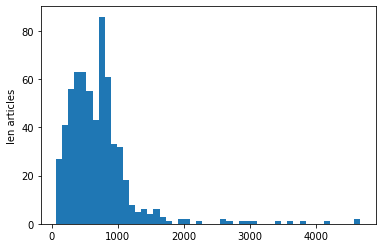

Article length distributon
count     599.000000
mean      620.439065
std       299.411590
min        66.000000
25%       384.000000
50%       602.000000
75%       824.000000
max      1484.000000
Name: text_lens, dtype: float64
Histogram lens of articles


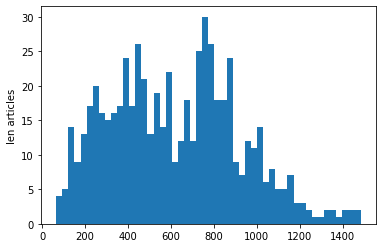

Starting text preprocessing..
                                                text  labels  text_lens  \
0  Buenos Aires Playa is an urban beach on the Rí...       0        408   
2  Contributed by Robert Lyman  © 2017The United ...       1       1591   
3  Share this...FacebookTwitterState parliamentar...       1        598   
5  On April 7, I wrote about global warming “hoth...       0        666   
6  From PragerU\r\nHas environmentalism become mo...       2        124   

                                          clean_text  
0  [buenos, aire, playa, urban, beach, ro, de, la...  
2  [contribute, robert, lyman, unite, kingdom, fi...  
3  [thisfacebooktwitterstate, parliamentarian, wo...  
5  [april, write, global, warm, hothead, dominate...  
6  [prageru, environmentalism, become, good, fait...  
Initialising Word2Vec vectorization
Loading word2vec model
[==================================================] 100.0% 1662.8/1662.8MB downloaded
Number of articles 628
words not found  113

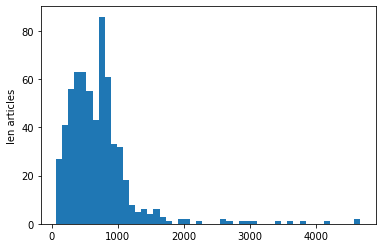

Article length distributon
count     599.000000
mean      620.439065
std       299.411590
min        66.000000
25%       384.000000
50%       602.000000
75%       824.000000
max      1484.000000
Name: text_lens, dtype: float64
Histogram lens of articles


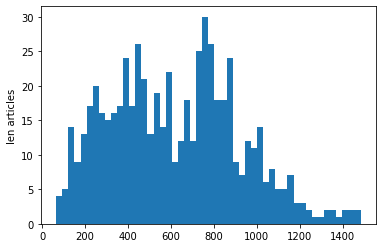

Starting text preprocessing..
                                                text  labels  text_lens  \
0  Buenos Aires Playa is an urban beach on the Rí...       0        408   
2  Contributed by Robert Lyman  © 2017The United ...       1       1591   
3  Share this...FacebookTwitterState parliamentar...       1        598   
5  On April 7, I wrote about global warming “hoth...       0        666   
6  From PragerU\r\nHas environmentalism become mo...       2        124   

                                          clean_text  
0  [buenos, aire, playa, urban, beach, ro, de, la...  
2  [contribute, robert, lyman, unite, kingdom, fi...  
3  [thisfacebooktwitterstate, parliamentarian, wo...  
5  [april, write, global, warm, hothead, dominate...  
6  [prageru, environmentalism, become, good, fait...  
Initialising tf-idf vectorization
Number of articles 628
Length vocab:  4551
Constructing vectors...
Size of dataframe  (628, 4552)

NORM_BOW

Importing data...
   label                    

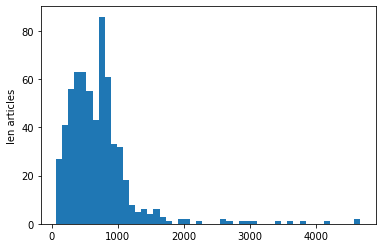

Article length distributon
count     599.000000
mean      620.439065
std       299.411590
min        66.000000
25%       384.000000
50%       602.000000
75%       824.000000
max      1484.000000
Name: text_lens, dtype: float64
Histogram lens of articles


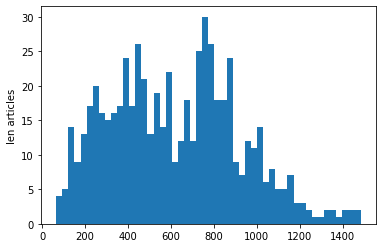

Starting text preprocessing..
                                                text  labels  text_lens  \
0  Buenos Aires Playa is an urban beach on the Rí...       0        408   
2  Contributed by Robert Lyman  © 2017The United ...       1       1591   
3  Share this...FacebookTwitterState parliamentar...       1        598   
5  On April 7, I wrote about global warming “hoth...       0        666   
6  From PragerU\r\nHas environmentalism become mo...       2        124   

                                          clean_text  
0  [buenos, aire, playa, urban, beach, ro, de, la...  
2  [contribute, robert, lyman, unite, kingdom, fi...  
3  [thisfacebooktwitterstate, parliamentarian, wo...  
5  [april, write, global, warm, hothead, dominate...  
6  [prageru, environmentalism, become, good, fait...  
Initialising norm_bow vectorization
Initialising normalised BOW model
Constructing normalised BOW vectors
Number of statements 628
Length vocab:  18802
Constructing vectors...
Size of dataf

In [4]:
%%time

# path = '../labelled_data/labelled_data.csv'
path = '../labelled_data/labelled_data_14032021.csv' ## switch to latest data when it's all working
embeddings = ['word2vec','tfidf','norm_bow']

for embedding_technique in embeddings:
    print("\n{0}\n".format(embedding_technique.upper()))
    preprocessing_pipeline(path, embedding_technique)